### House prices: regression 
many thanks to Seringe for his fabulous kernel : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
Special thanks to Pedro Marcelino for his tips :https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
and Alexandru kernel :https://www.kaggle.com/apapiu/regularized-linear-models

# Importing Data

In [2641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *
from plotnine.data import *
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")




In [2642]:
PATH = "Data/Housing/"

In [2643]:
!ls {PATH}

data_description.txt  sub1.csv              test.csv
sample_submission.csv sub2.csv              train.csv


In [2644]:
!head Data/Housing/train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [2645]:
df_raw_train = pd.read_csv(f'{PATH}train.csv' , low_memory=False)
df_raw_test = pd.read_csv(f'{PATH}test.csv', low_memory=False)



In [2646]:
def display_all(df):
    with pd.option_context("display.max_rows",200):
     with pd.option_context("display.max_columns",200):
        display(df)
 

In [2647]:
display_all(df_raw_train.tail().transpose())

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# Handling Missing Data

### Checking missing data

In [2648]:
# Making full Data
full_data = pd.concat([df_raw_train,df_raw_test],ignore_index=False)
#full_data=df_raw_train.append(df_raw_test,sort=False)
# Fill empty and NaN values with NaN
full_data.fillna(np.nan)

def find_na(df):
    import missingno as msno
    na_percent=pd.DataFrame()
    na_percent["num_na"] = df.isnull().sum()
    na_percent["percent"] = df.apply(lambda x:x.isnull().sum()/len(df))
   # display(na_percent)
    msno.matrix(df)
    df_nan= pd.DataFrame()
    dummy1= na_percent.index
    for ind in dummy1:
        #if na_percent.loc[na_percent.index == ind, "num_na"] >= 0:
        if na_percent[na_percent.index== ind]["num_na"][0] > 0:
            df_nan =df_nan.append(na_percent[na_percent.index == ind])
    global df_nan_global
    df_nan_global=df_nan.sort_values("percent",ascending=False)
    display(df_nan_global)
       
    

In [2649]:
full_data.describe(include="int").transpose()

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
3SsnPorch,2919.0,2.602261,25.188169,0.0,0.0,0.0,0.0,508.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0
EnclosedPorch,2919.0,23.098321,64.244246,0.0,0.0,0.0,0.0,1012.0
Fireplaces,2919.0,0.597122,0.646129,0.0,0.0,1.0,1.0,4.0
FullBath,2919.0,1.568003,0.552969,0.0,1.0,2.0,2.0,4.0
GrLivArea,2919.0,1500.759849,506.051045,334.0,1126.0,1444.0,1743.5,5642.0
HalfBath,2919.0,0.380267,0.502872,0.0,0.0,0.0,1.0,2.0
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0


## Finding correlation between variables

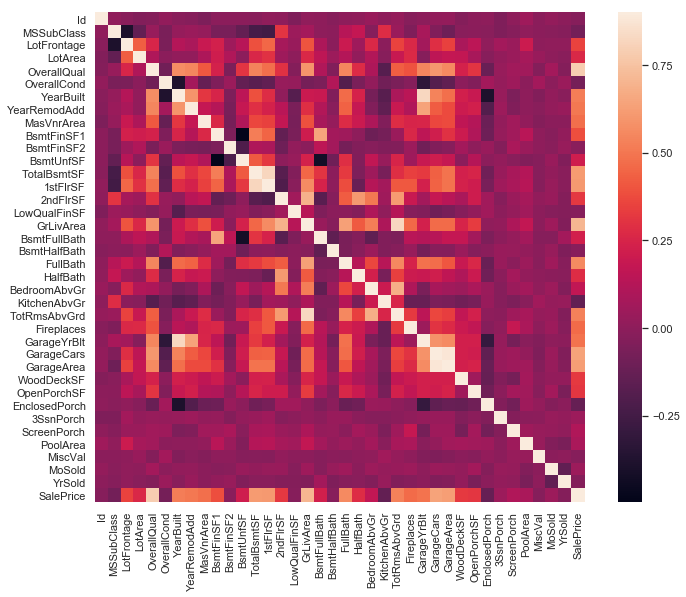

In [2650]:
#Correlation map to see how features are correlated with SalePrice
import seaborn as sns
corrmat = df_raw_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### According to the heatmap we see that there are two bright square on the diagonal line! GarageCars and Garage Area and  totalBsmtSF and 1stFlrSF are correlated. Since we are using Linearregression we need to know that this colinearity will be a headache!


### Let's make a zoom-in correlation matrix around Salesprice!

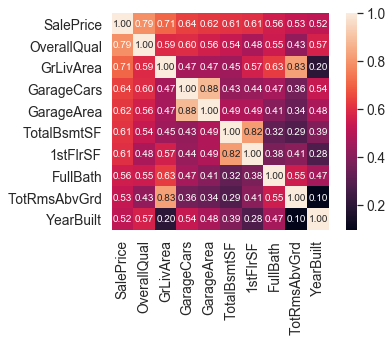

In [2651]:
cols = corrmat.nlargest(10,"SalePrice")["SalePrice"].index
sns.set(font_scale=1.25)
hm =df_raw_train[cols].corr()
sns.set(font_scale=1.25)
sns.heatmap(hm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})


#### Look at athe amazing relationship between SalePrice and OverallQual and GrLivArea

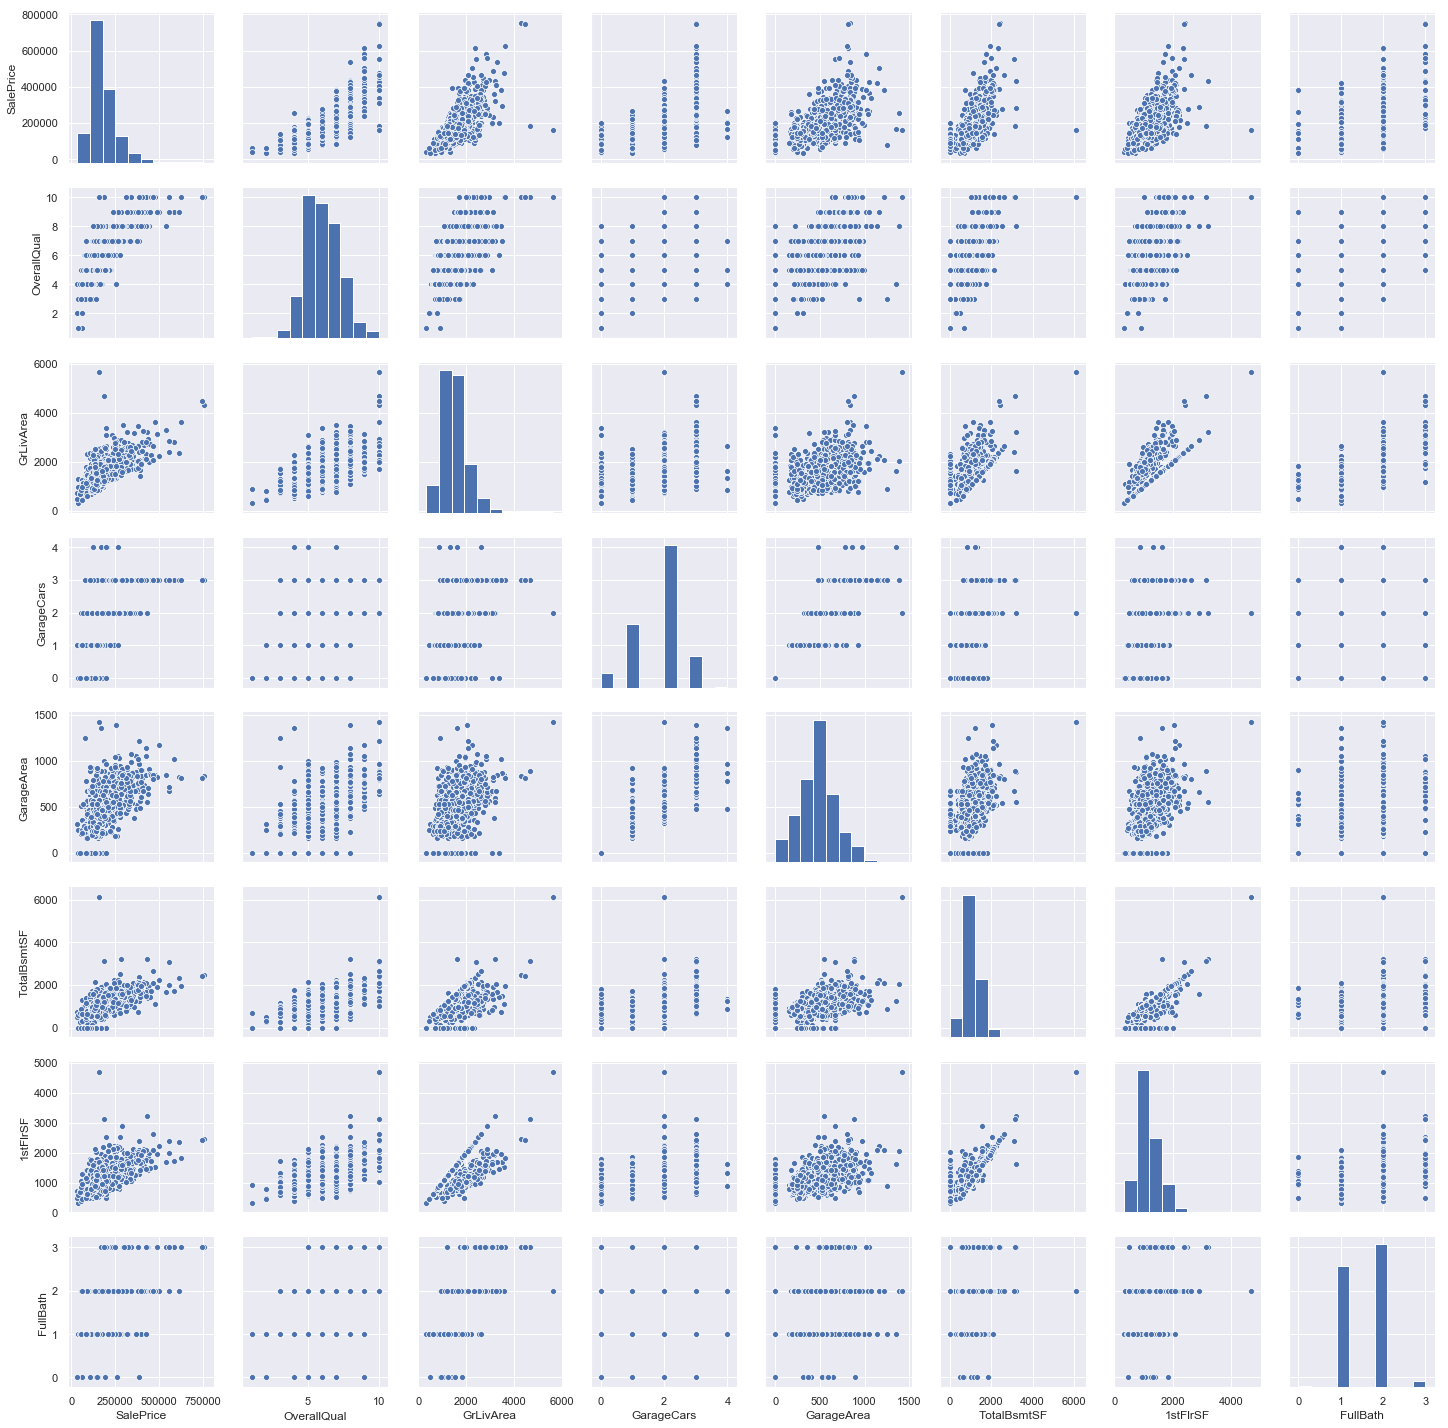

In [2652]:
#scatterplot
sns.set()
sns.pairplot(df_raw_train[cols].drop(["TotRmsAbvGrd","YearBuilt"],axis=1))
plt.show();

In [2653]:
### Some very good insights can be found from the pairplots like relation

In [2654]:
### Dealing with missing values

In [2655]:
# in readme files it is mentioned that Nan in some variables means that no parking or no basement
full_data["PoolQC"].fillna("None",inplace=True)
full_data["MiscFeature"].fillna("None",inplace=True)
full_data["Fence"].fillna("None",inplace=True)
full_data["FireplaceQu"].fillna("None",inplace=True)
full_data["LotFrontage"].fillna("None",inplace=True)
full_data["GarageFinish"].fillna("None",inplace=True)
full_data["GarageQual"].fillna("None",inplace=True)
full_data["GarageYrBlt"].fillna("None",inplace=True)
full_data["GarageCond"].fillna("None",inplace=True)
full_data["GarageType"].fillna("None",inplace=True)
full_data["BsmtCond"].fillna("None",inplace=True)
full_data["BsmtExposure"].fillna("None",inplace=True)
full_data["BsmtQual"].fillna("None",inplace=True)
full_data["BsmtFinType2"].fillna("None",inplace=True)
full_data["BsmtFinType1"].fillna("None",inplace=True)


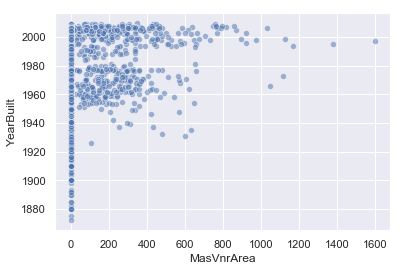

<Figure size 432x288 with 0 Axes>

In [2656]:
### Dealing with Masonary type and area missing values
# Scenario 1 we impute nan with Stone because of similar mean

sns.scatterplot(x="MasVnrArea", y="YearBuilt",data=df_raw_train,alpha = 0.5);
fig = plt.figure()


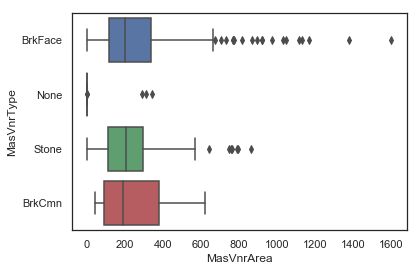

<Figure size 432x288 with 0 Axes>

In [2657]:
# Lets see reation between MasVnrArea rows with value of 0 vs their MasVnType
sns.set(style="white")
sns.boxplot(x="MasVnrArea", y="MasVnrType",data=df_raw_train);
fig = plt.figure()



In [2658]:
df_raw_train.loc[df_raw_train["MasVnrType"]== "None"]["MasVnrArea"].describe()

count    864.000000
mean       1.094907
std       18.569659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

#### We see that almost every property with None value in MasVnrType has value of 0 which makes sense. Therefore we don't manipute this part

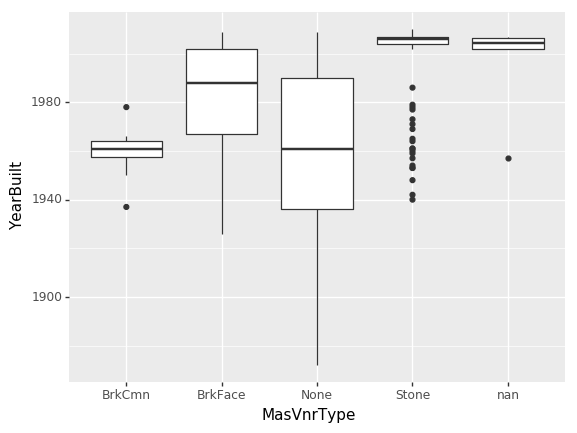

<ggplot: (7611130274)>

In [2659]:
### Dealing with Masonary type and area missing values
# Scenario 1 we impute nan with Stone because of similar mean
(ggplot(df_raw_train,aes(x="MasVnrType",  y="YearBuilt"))+geom_boxplot() )

In [2660]:
# Scenario 2 we impute nan with None as dominant form of masonary between 2002 till 2007
dummy2 =df_raw_train[(df_raw_train["YearBuilt"] > 2002) & (df_raw_train["YearBuilt"]< 2007)]["MasVnrType"]
dummy2.value_counts()
full_data[full_data.MasVnrType.isnull()][["YearBuilt"]]
## anyway we need to treat something else with the two built on 1957, 1961

,YearBuilt
234,2002
529,1957
650,2007
936,2003
973,2007
977,2006
1243,2006
1278,2002
231,2002
246,2008


In [2661]:
full_data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1stFlrSF,2919,NaN,NaN,NaN,1159.58,392.362,334,876,1082,1387.5,5095
2ndFlrSF,2919,NaN,NaN,NaN,336.484,428.701,0,0,0,704,2065
3SsnPorch,2919,NaN,NaN,NaN,2.60226,25.1882,0,0,0,0,508
Alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,2919,NaN,NaN,NaN,2.86023,0.822693,0,2,3,3,8
BldgType,2919,5,1Fam,2425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,2919,5,TA,2606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,2919,5,No,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,2918,NaN,NaN,NaN,441.423,455.611,0,0,368.5,733,5644
BsmtFinSF2,2918,NaN,NaN,NaN,49.5822,169.206,0,0,0,0,1526


In [2662]:
full_data.loc[full_data["MasVnrType"].isnull() & full_data["YearBuilt"].isin([1957, 1968]),"MasVnrType"]= "None"
full_data.loc[full_data["MasVnrType"].isnull(),"MasVnrType"]="Stone"
display(full_data["MasVnrType"].isnull().sum())


0

In [2663]:
#full_data.groupby('MasVnrType').MasVnrArea.transform(lambda x: x.fillna(x.mode()[0]))
full_data["MasVnrArea"] = full_data.groupby('MasVnrType')["MasVnrArea"].transform(lambda x: x.fillna(x.mode()[0]))


### Dealing with single missing values!

In [2664]:
full_data.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

### Dealing with Alley missing values!

In [2665]:
### one hot encoding 
df_impute=full_data[["Neighborhood","MSZoning","LotFrontage","Street"]]
df_dummies = pd.get_dummies(df_impute)
df_dummies["Alley"] = full_data["Alley"]
df_dummies["Alley"]=df_dummies["Alley"].map({"None":0,"Grvl":1,"Pave":2,"Stone":3})
from fancyimpute import KNN
#fancy impute removes column names.
train_cols = list(df_dummies)
# Use IterativeImputer to fill in each row's missing features
df_dummies = pd.DataFrame(KNN(k=5).fit_transform(df_dummies))
df_dummies.columns = train_cols



Imputing row 1/2919 with 1 missing, elapsed time: 5.166
Imputing row 101/2919 with 1 missing, elapsed time: 5.169
Imputing row 201/2919 with 1 missing, elapsed time: 5.172
Imputing row 301/2919 with 1 missing, elapsed time: 5.174
Imputing row 401/2919 with 1 missing, elapsed time: 5.177
Imputing row 501/2919 with 1 missing, elapsed time: 5.179
Imputing row 601/2919 with 1 missing, elapsed time: 5.181
Imputing row 701/2919 with 1 missing, elapsed time: 5.184
Imputing row 801/2919 with 1 missing, elapsed time: 5.186
Imputing row 901/2919 with 1 missing, elapsed time: 5.188
Imputing row 1001/2919 with 1 missing, elapsed time: 5.192
Imputing row 1101/2919 with 1 missing, elapsed time: 5.195
Imputing row 1201/2919 with 1 missing, elapsed time: 5.197
Imputing row 1301/2919 with 1 missing, elapsed time: 5.199
Imputing row 1401/2919 with 1 missing, elapsed time: 5.202
Imputing row 1501/2919 with 1 missing, elapsed time: 5.204
Imputing row 1601/2919 with 1 missing, elapsed time: 5.206
Imputing 

,num_na,percent
SalePrice,1459,0.499829
MSZoning,4,0.001370
Functional,2,0.000685
Utilities,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFullBath,2,0.000685
BsmtUnfSF,1,0.000343
Electrical,1,0.000343
Exterior1st,1,0.000343
Exterior2nd,1,0.000343


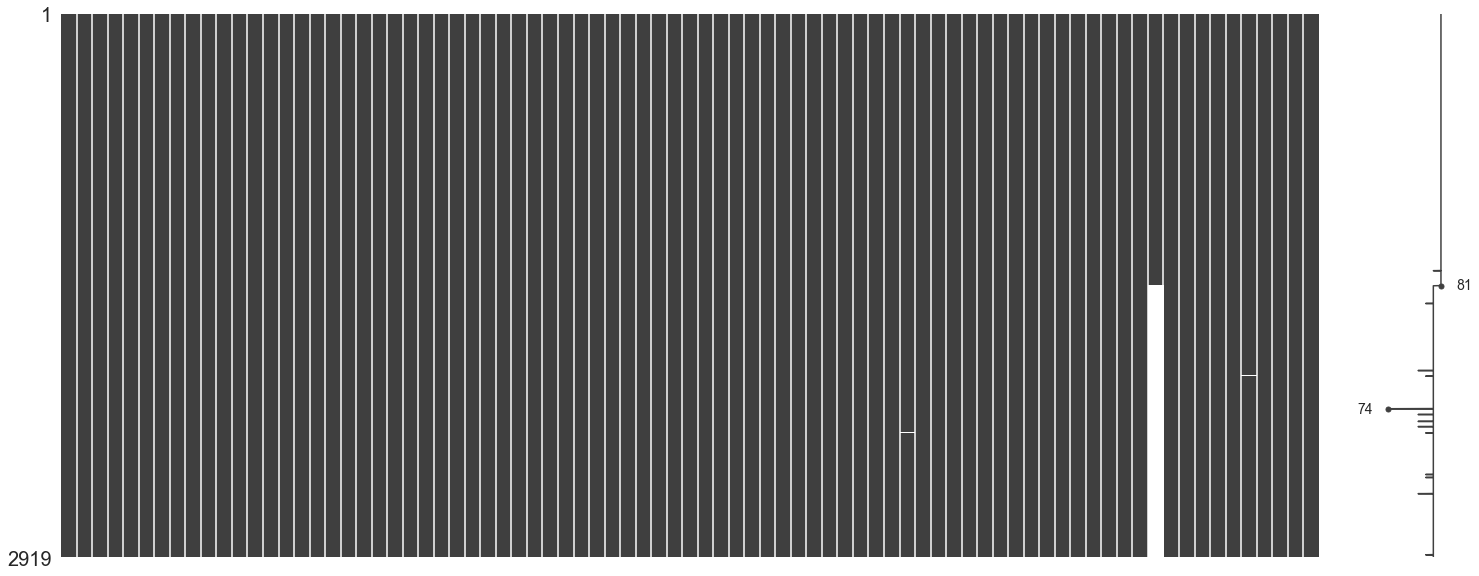

In [2666]:
#### Bedcause categorical data in fancyimpute is not supported, I rounded the float predicted values for Alley
df_dummies["Alley"]=df_dummies["Alley"].astype(int)
full_data["Alley"]=df_dummies["Alley"]
find_na(full_data)

In [2667]:
old_list = df_nan_global.index[-16:]
old_list


Index(['MSZoning', 'Functional', 'Utilities', 'BsmtHalfBath', 'BsmtFullBath',
       'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF2',
       'GarageArea', 'GarageCars', 'KitchenQual', 'SaleType', 'TotalBsmtSF',
       'BsmtFinSF1'],
      dtype='object')

In [2668]:
old_list = df_nan_global.index[-16:]
for item in old_list:
   # full_data = full_data.drop(full_data.loc[full_data[item].isnull()].index)
    if full_data[item].dtype != "object":
        full_data.loc[full_data[item].isnull(),item] =full_data[item].mean()
    else:
        full_data.loc[full_data[item].isnull(),item]=full_data[item].mode()[0]
     

In [2671]:
### Let's see what else should we do with our  features in feature engineering
full_data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,1.069887,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.255000,0.822693,455.532750,169.176615,0.524556,0.245603,439.468337,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.690726,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,1.000000,3.000000,369.000000,0.000000,0.000000,0.000000,467.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,990.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,1.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,2.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [2672]:
### Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
df1 = full_data.loc[:, full_data.columns.str.endswith("Qual") | full_data.columns.str.endswith("Cond")]
cols= df1.columns
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full_data[c].values)) 
    full_data[c] = lbl.transform(list(full_data[c].values))

# shape        
print(f"Shape full_data: {full_data.shape}")

Shape full_data: (2919, 81)


In [2673]:
### Adding the feature of total area
df2 = full_data.loc[:, full_data.columns.str.contains("F") & full_data.columns.str.contains("SF")]
col2 = df2.columns
col2


Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'OpenPorchSF', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

In [2674]:
full_data["TotalArea"] = full_data["1stFlrSF"] + full_data["2ndFlrSF"] + full_data["TotalBsmtSF"]
full_data["TotalArea"] = full_data["TotalArea"].astype("float64")
full_data["1stFlrSF"].dtype

dtype('int64')

,num_na,percent
SalePrice,1459,0.499829


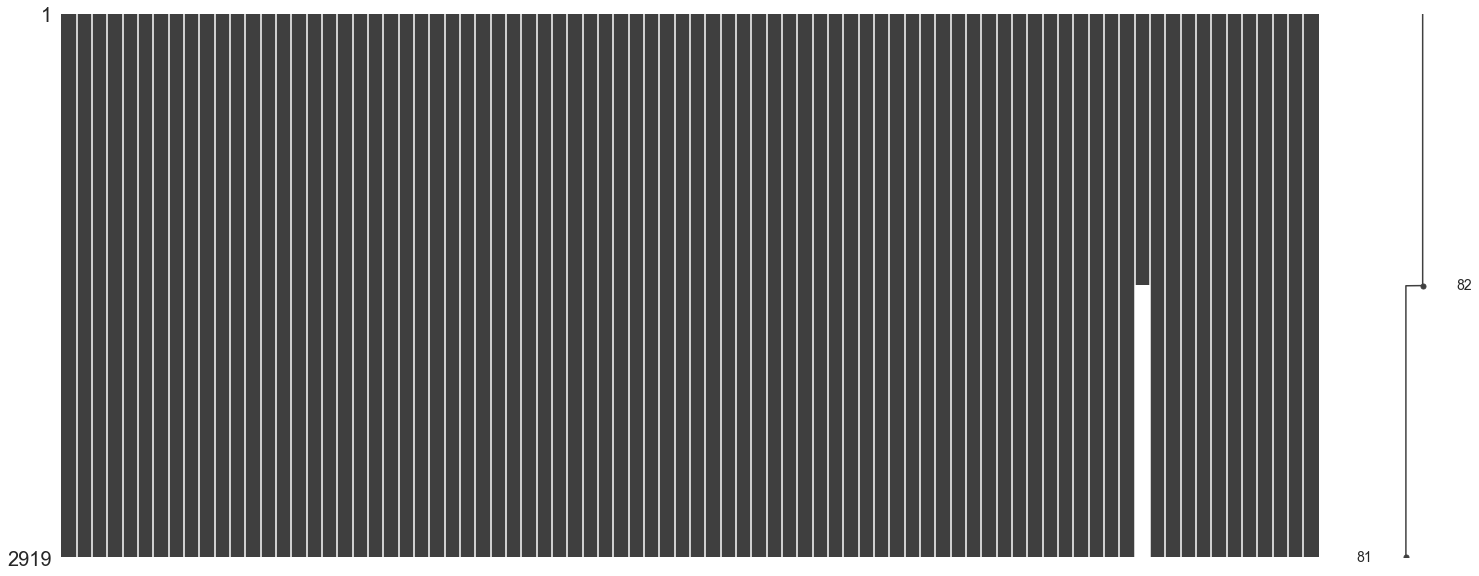

In [2675]:
find_na(full_data)

In [2676]:
### Dealing with skewness


In [2677]:
#full_data["SalePrice"] = np.log1p(full_data["SalePrice"])

#log transform skewed numeric features:
numeric_feats = full_data.dtypes[full_data.dtypes != "object"].index

skewed_feats = full_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
print(f"There are {skewed_feats.size} skewed numerical features to log transform")
skewed_feats = skewed_feats.index

full_data[skewed_feats] = np.log1p(full_data[skewed_feats])

There are 30 skewed numerical features to log transform


### One hot encoding


In [2678]:
full_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalArea
0,6.753438,6.751101,0.000000,0.693147,3,1Fam,1.609438,No,6.561031,0.000000,...,0.000000,Pave,2.197225,6.753438,AllPub,0.000000,2003,2003,2008,7.850493
1,7.141245,0.000000,0.000000,0.693147,3,1Fam,1.609438,Gd,6.886532,0.000000,...,0.000000,Pave,1.945910,7.141245,AllPub,5.700444,1976,1976,2007,7.833996
2,6.825460,6.765039,0.000000,0.693147,3,1Fam,1.609438,Mn,6.188264,0.000000,...,0.000000,Pave,1.945910,6.825460,AllPub,0.000000,2001,2002,2008,7.903596
3,6.869014,6.629363,0.000000,0.693147,3,1Fam,0.693147,No,5.379897,0.000000,...,0.000000,Pave,2.079442,6.629363,AllPub,0.000000,1915,1970,2006,7.813592
4,7.044033,6.960348,0.000000,0.693147,4,1Fam,1.609438,Av,6.486161,0.000000,...,0.000000,Pave,2.302585,7.044033,AllPub,5.262690,2000,2000,2008,8.114923
5,6.680855,6.340359,5.771441,0.693147,1,1Fam,1.609438,No,6.597146,0.000000,...,0.000000,Pave,1.791759,6.680855,AllPub,3.713572,1993,1995,2009,7.677400
6,7.435438,0.000000,0.000000,0.693147,3,1Fam,1.609438,Av,7.222566,0.000000,...,0.000000,Pave,2.079442,7.430707,AllPub,5.545177,2004,2005,2007,8.125927
7,7.010312,6.891626,0.000000,0.693147,3,1Fam,1.609438,Mn,6.756932,3.496508,...,0.000000,Pave,2.079442,7.010312,AllPub,5.463832,1973,1973,2009,8.070281
8,6.930495,6.624065,0.000000,0.693147,2,1Fam,1.609438,No,0.000000,0.000000,...,0.000000,Pave,2.197225,6.859615,AllPub,4.510860,1931,1950,2008,7.910957
9,6.982863,0.000000,0.000000,1.098612,2,2fmCon,1.609438,No,6.747587,0.000000,...,0.000000,Pave,1.791759,6.899723,AllPub,0.000000,1939,1950,2008,7.634821


In [2679]:

full_data = pd.get_dummies(full_data)


### Splitting train and test

In [2680]:
test_num = df_raw_test.shape[0]
train_num = full_data.shape[0] - test_num
df_train = full_data[:train_num]
df_test = full_data [train_num:]
y=df_train["SalePrice"]
X = df_train.drop(["SalePrice"],axis=1)
Xtest = df_test.drop(["SalePrice"],axis=1)



In [2681]:
full_data.shape

(2919, 506)

### Making Models

In [2682]:
### importing libraries, see this kernel : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from sklearn.linear_model import ElasticNet, LassoCV,  Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb       


In [2683]:
#Finding negative mean squate error with cross validation

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)



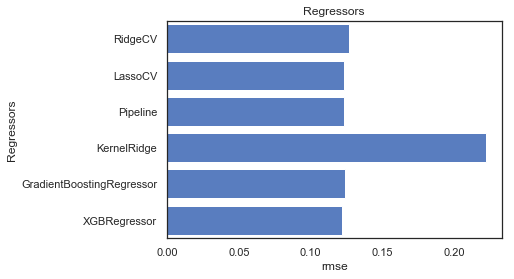

In [2684]:
regressors=[]
##ridge regression
ridge_model = RidgeCV(alphas=[0.1,1,10])
regressors.append(ridge_model)
##Lasso regression
lasso_model = LassoCV(alphas=[1, 0.1, 0.001, 0.0005])
regressors.append(lasso_model)
lasso_robust = make_pipeline(RobustScaler(),LassoCV(alphas=[1, 0.1, 0.001, 0.0005]))
regressors.append(lasso_robust)
##Elastic Net regression
ENet_model = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
regressors.append(ENet_model)
##Kernel regression
KRR_model = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
regressors.append(KRR_model)
### Gradiant Boosting regression with HUBER loss is robust agaist outliers
GBoost_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)   
regressors.append(GBoost_model)
## XGBOOST
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
regressors.append(xgb_model)

log_cols = ["Regressors", "rmse"]
log = pd.DataFrame(columns=log_cols)




rmse_dict = {}
for reg in  regressors:
        name = reg.__class__.__name__
        rmse = rmse_cv(reg).mean()
       
        rmse_dict[name] = rmse

for reg in rmse_dict:
    rmse_dict[reg] = rmse_dict[reg] 
    log_entry = pd.DataFrame([[reg, rmse_dict[reg]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('rmse')
plt.title('Regressors')

sns.set_color_codes("muted")
sns.barplot(x='rmse', y='Regressors', data=log, color="b")






In [2685]:
## There is an error in the image above, pipeline is name of two algorithm and it is displayed the last one ENet

In [2686]:
# sorting rmse values
log.sort_values('rmse',ascending=True)


,Regressors,rmse
0,XGBRegressor,0.121673
0,Pipeline,0.123052
0,LassoCV,0.123372
0,GradientBoostingRegressor,0.124087
0,RidgeCV,0.126701
0,KernelRidge,0.221787


In [2687]:
# Selecting the best model and predicting
best_regressor = xgb_model
best_regressor.fit(X, y)
result = np.expm1(best_regressor.predict(Xtest))


In [2688]:
submission =pd.DataFrame({"Id":df_raw_test["Id"],"SalePrice": result})

In [2689]:
submission.to_csv("Data/Housing/sub1.csv",header=True,index=False)

In [2690]:
# Selecting the best model and predicting
lasso_robust = make_pipeline(RobustScaler(),LassoCV(alphas=[1, 0.1, 0.001, 0.0005]))
best_regressor = lasso_robust
best_regressor.fit(X, y)
result_2 = np.expm1(best_regressor.predict(Xtest))



In [2691]:
submission =pd.DataFrame({"Id":df_raw_test["Id"],"SalePrice": result_2})

In [ ]:
submission.to_csv("Data/Housing/sub2.csv",header=True,index=False)

### Averaging model

In [2697]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [2699]:
averaged_models = AveragingModels(models = (lasso_robust, ENet_model, xgb_model))


In [2700]:
best_regressor = averaged_models
best_regressor.fit(X, y)
result_3 = np.expm1(best_regressor.predict(Xtest))

In [2701]:
submission =pd.DataFrame({"Id":df_raw_test["Id"],"SalePrice": result_3})

In [2702]:
submission.to_csv("Data/Housing/sub3.csv",header=True,index=False)